Testing bnstruct R package. See documentation [here](https://cran.r-project.org/web/packages/bnstruct/vignettes/bnstruct.pdf) and [here](https://cran.r-project.org/web/packages/bnstruct/bnstruct.pdf).

In [1]:
library("bnstruct")

Loading required package: bitops
Loading required package: Matrix
Loading required package: igraph

Attaching package: ‘igraph’

Die folgenden Objekte sind maskiert von ‘package:stats’:

    decompose, spectrum

Das folgende Objekt ist maskiert ‘package:base’:

    union



In [2]:
count <- function(x) {
    return(length(unique(x)))
}

quantize <- function(x) {
    return(x - min(x) + 1)
}

In [6]:
# Given model:
#
#    A -> B
#    A -> C
#    B -> D
#    C -> D
#

SIZE <- 1000

A <- round(rnorm(SIZE, 10, 2))
B <- round(0.4 * A + rnorm(SIZE, 10, 1))
C <- round(0.8 * A + rnorm(SIZE, 10, 1.5))
D <- round(0.4 * B + 0.2 * C + rnorm(SIZE, 10, 1))

data = cbind(A, B, C, D)
data = apply(data, 2, quantize)

dataset <- BNDataset(data = as.matrix(data),
                     discreteness = rep('D', 4),
                     variables = c("A", "B", "C", "D"),
                     node.sizes = apply(data, 2, count))

dataset_bs <- bootstrap(dataset, num.boots = 1000)

bnstruct :: Generating bootstrap samples ...
bnstruct :: Bootstrap samples generated.


bnstruct :: learning the structure using SEM ...
... bnstruct :: starting EM algorithm ...
... ... bnstruct :: learning network parameters ... 
... ... bnstruct :: parameter learning done.
... ... bnstruct :: learning network parameters ... 
... ... bnstruct :: parameter learning done.
... bnstruct :: EM algorithm completed.
... bnstruct :: learning the structure using MMHC ...
... bnstruct :: learning using MMHC completed.
... bnstruct :: learning network parameters ... 
... bnstruct :: parameter learning done.
... bnstruct :: starting EM algorithm ...
... ... bnstruct :: learning network parameters ... 
... ... bnstruct :: parameter learning done.
... ... bnstruct :: learning network parameters ... 
... ... bnstruct :: parameter learning done.
... bnstruct :: EM algorithm completed.
... bnstruct :: learning the structure using MMHC ...
... bnstruct :: learning using MMHC completed.
... bnstruct :: learning network parameters ... 
... bnstruct :: parameter learning done.
bnstruct :: l

0,1,1,0
0,0,0,1
0,0,0,0
0,0,0,0


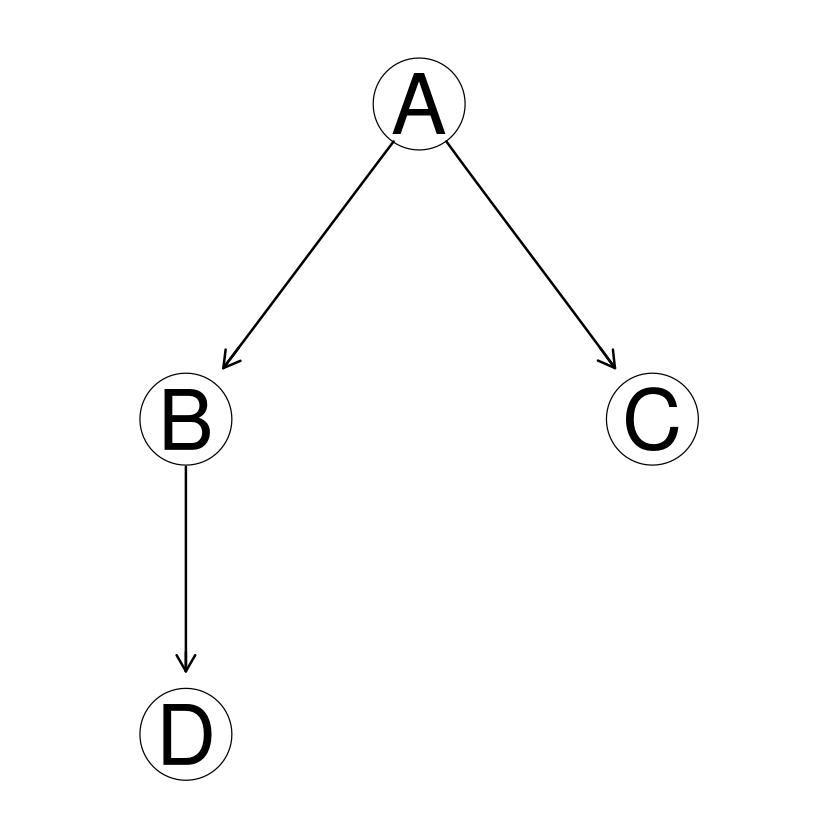

In [4]:
net <- learn.network(dataset, scoring.func = "BDeu", algo="SEM")
dag(net)
plot(net)

bnstruct :: learning the structure using MMHC ...
bnstruct :: learning using MMHC completed.


0,439,924,0
978,0,0,1000
999,0,0,1
0,1000,3,0


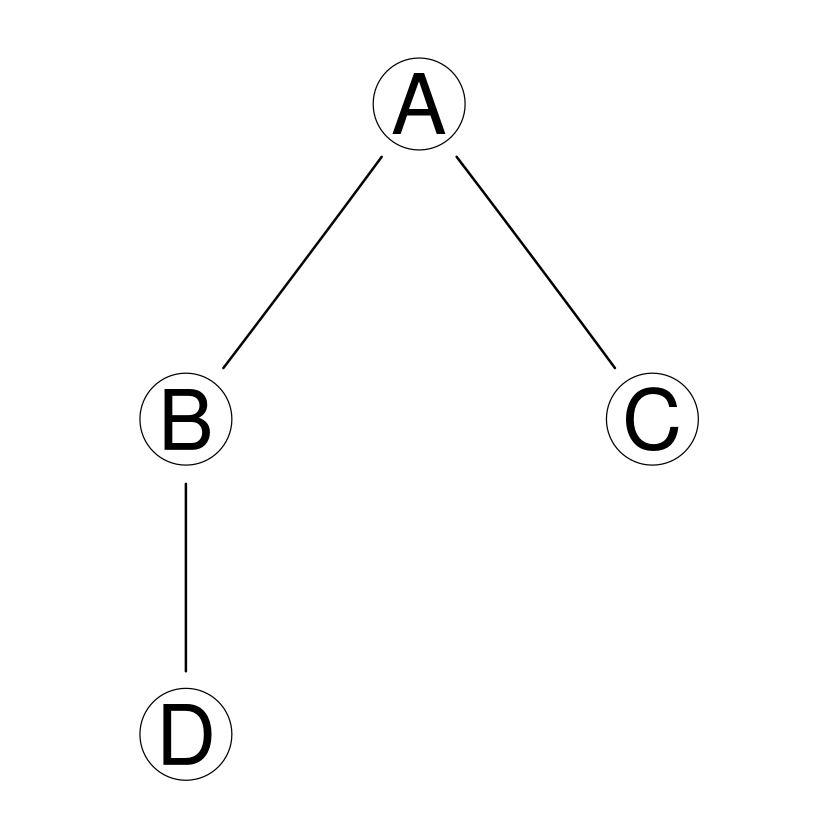

In [7]:
net <- learn.network(dataset_bs, bootstrap = TRUE)
wpdag(net)
plot(net, plot.wpdag=T)

In [ ]:
dataset <- bootstrap(dataset)
net <- learn.network(dataset, bootstrap = TRUE)

plot(net)